# Correlation analysis

In this notebook we cover the steps for conducting the correlation analysis.

## Pre-requisities

* The final data has been harmonized
    * Grouped per sector
    * Sentiment analysis has been done
* Requirements installed: `pip install -f requirements.txt`

## Step 1

The first step is to import dependencies and load the data into `df` variable. We also create a new column called `crime_density` which accounts the area that the sector covers, and the count of crimes in that area.



In [31]:
import pandas as pd
from scipy.stats import pearsonr, normaltest
import matplotlib.pyplot as plt
# Display images in the notebook
%matplotlib inline

FINAL_DATA_IN = 'datasets/out/final_data_avg.csv'

df = pd.read_csv(FINAL_DATA_IN)

df['crime_density'] = df.apply(
    lambda x: x['crime_count'] / x['area'],
    axis = 1
)


## Step 2

In this step, we simply plot the features that we have extracted using NLP methods from the Hotel data. The features are plotted with the `crime_density` variable.

Explaining variable: `sentiment_crime`, `sentiment_positive`, `sentiment_unsafe`
Explained variable: `crime_density`

Basically the scatter plots should display somewhat visible line in case there were correlation between the variables (e.g. if `sentiment_crime` can explain the change in `crime_density`).


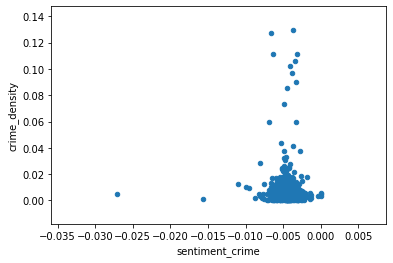

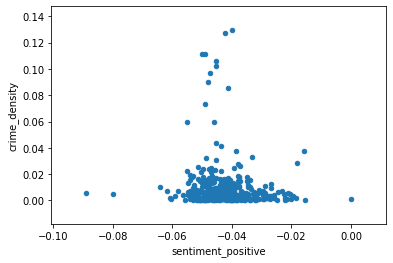

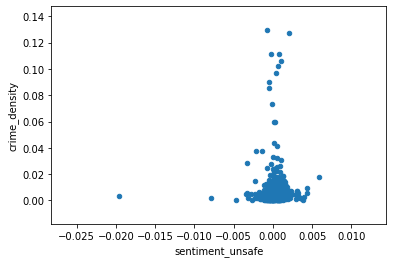

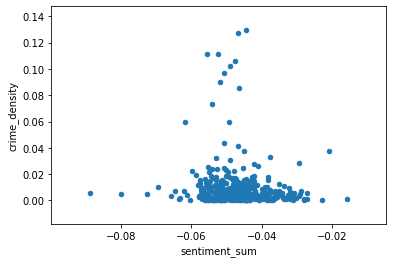

In [34]:

df.plot(
    x = 'sentiment_crime',
    y = 'crime_density',
    kind = 'scatter'
)

df.plot(
    x = 'sentiment_positive',
    y = 'crime_density',
    kind = 'scatter'
)

df.plot(
    x = 'sentiment_unsafe',
    y = 'crime_density',
    kind = 'scatter'
)

df.plot(
    x = 'sentiment_sum',
    y = 'crime_density',
    kind = 'scatter'
)


## Step 3

The next step is to investigate further the [correlation](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) between variables in the dataset.

As we are looking mostly at metric variables, we have several options:

* Pearson's product-moment correlation method
* Spearman rank-order correlation

Pandas `DataFrame` [supports](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) also Kendall's method, but we don't have experience on that right now.

There are some tests that we should consider before choosing the method of correlation test. Generally, the Pearson's method is the choice when the data is normally distributed on all variables. If it's not, then we should consider Spearman.



In [5]:

# p = 2-sided chi squared probability for the hypothesis test
k2, p = normaltest(df['crime_density'])

# if p < 0.05, null hypothesis can be rejected and the result is statistically almost significant
# if p < 0.01, -||- and the result is statistically significant
# if p < 0.001, -||- and the result is statistically extremely significant

alpha = 1e-3

print(p)

if p < alpha:
    print('The null hypothesis can be rejected')
else:
    print('The null hypothesis cannot be rejected')

# TODO: Loop through all (relevant) variables and test their distribution



9.827597913647074e-92
The null hypothesis can be rejected


As it can be seen from the results, the data is `--` distributed. Thus, we should use `---` method for measuring correlation coeffecients.

This regression analysis is trying to find correlation between two (or more) variables. Logically, the correlation between variables can be either positive or negative. The intepretation of correlation goes somewhat like this:

| Value range   | Intepretation                                     |
|---------------|---------------------------------------------------|
| 0.6 - 1.0     | (Strong) Positive correlation                     |
| 0.4 - 0.59    | Weak positive correlation                         |
| 0.0 - 0.39    | Really weak or non-existent positive correlation  |
| 0.0 - -0.39   | Really weak or non-existent negative correlation  |
| -0.4 - -0.59  | Weak negative correlation                         |
| -0.6 - -1.0   | (Strong) Negative correlation                     |

**TODO**: The table above might be wrong in some areas. Double check that the intepretation is correct.


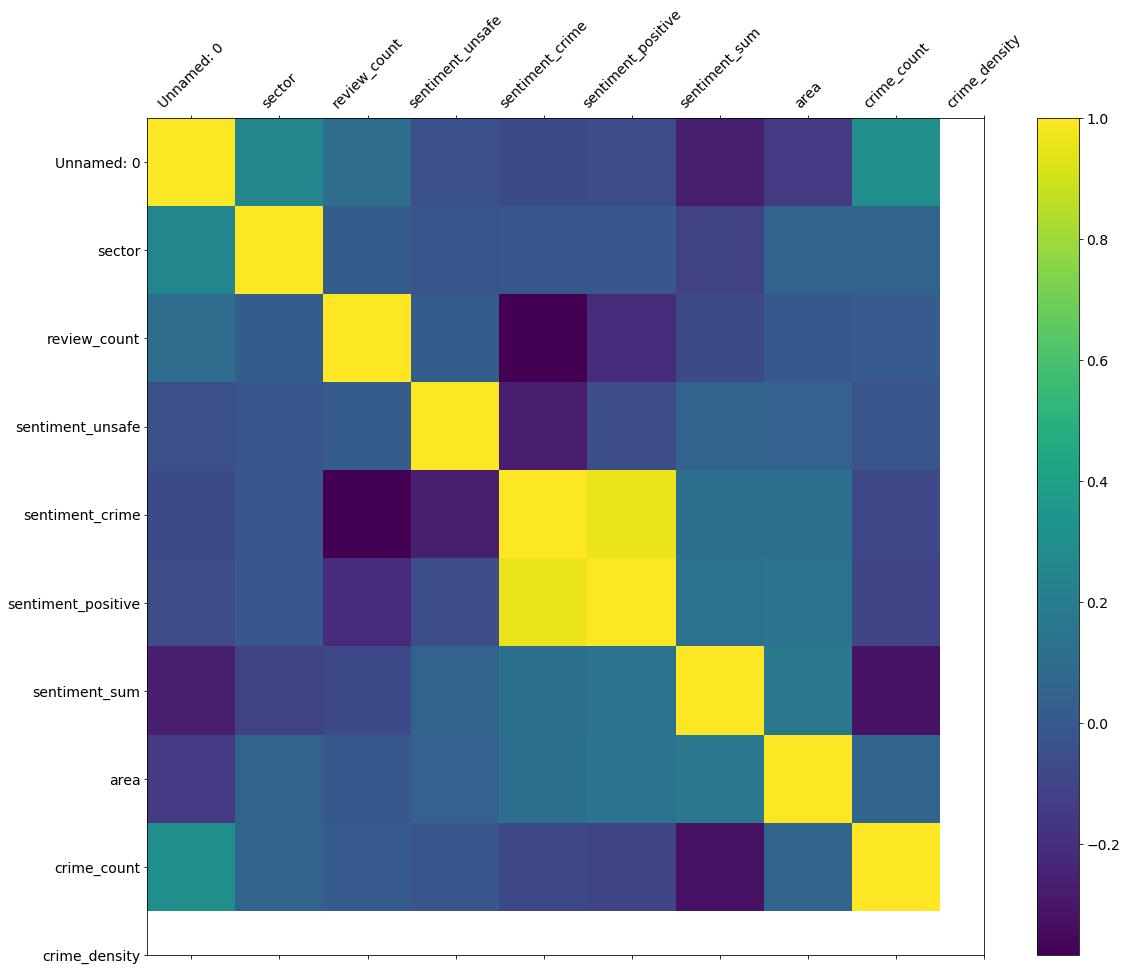

In [33]:
# Pearson's method for normally distributed data
# Spearman's method for 
correlations = df.corr(method = 'pearson')

f = plt.figure(figsize = (19, 15))
plt.matshow(correlations, fignum = f.number)
plt.xticks(range(df.shape[1]), labels = df.columns, fontsize = 14, rotation = 45)
plt.yticks(range(df.shape[1]), labels = df.columns, fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.show()